In [4]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import plotly
import plotly.express as px


churn_data = pd.read_csv('data/churn.csv')
churn_data.head()


##RowNumber — номер строки таблицы (это лишняя информация, поэтому можете сразу от неё избавиться)
##CustomerId — идентификатор клиента
##Surname — фамилия клиента
##CreditScore — кредитный рейтинг клиента (чем он выше, тем больше клиент брал кредитов и возвращал их)
##Geography — страна клиента (банк международный)
##Gender — пол клиента
##Age — возраст клиента
##Tenure — сколько лет клиент пользуется услугами банка
##Balance — баланс на счетах клиента в банке
##NumOfProducts — количество услуг банка, которые приобрёл клиент
##HasCrCard — есть ли у клиента кредитная карта (1 — да, 0 — нет)
##IsActiveMember — есть ли у клиента статус активного клиента банка (1 — да, 0 — нет)
##EstimatedSalary — предполагаемая заработная плата клиента
##Exited — статус лояльности (1 — ушедший клиент, 0 — лояльный клиент)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 9.1. Каково соотношение ушедших и лояльных клиентов? Покажите это на графике и дайте комментарий по соотношению

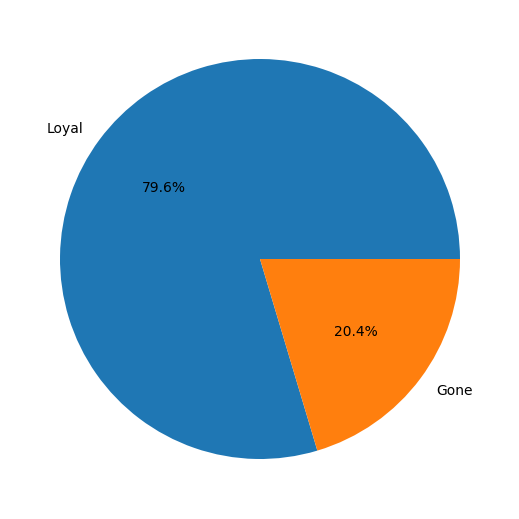

In [5]:

churn_data['ExitedName'] = churn_data['Exited'].apply(lambda x: 'Loyal' if x == 0 else 'Gone')

client_combinations = churn_data['ExitedName'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    client_combinations,
    labels=client_combinations.index,
    autopct='%.1f%%'    
);

**Выводы по графику:** на графике видно что ушедших клиентов чуть больше 1/5 от общего количества.

### 9.2. Постройте график, показывающий распределение баланса пользователей, у которых на счету больше 2 500 долларов. Опишите распределение и сделайте выводы.

In [3]:
balance = churn_data[churn_data['Balance'] > 2500]

fig = px.histogram(
    balance,
    x='Balance',    
    labels={'Balance':'Баланс на счету клиента, $', 'y':'Количество клиентов, чел.'},
    marginal='box',
    nbins=30,
);
fig.show()



**Выводы по графику:** по гистограмме можно судить о количестве клиентов в определенном интервале. На оси абсцисс отложен диапазон сумм, разбитый на 30 равных интервалов (количество денег, которое находится на счету у клиента банка). На оси ординат - число клиентов, попавших в этот интервал.

Во-первых, мы видим модальные значения денег более 2500$ и до примерно 250000$, где большинство денежных средств сосредоточено в середине интервала от 90000$ до 150000$. В целом видимо условия в банке для клиентов приемлемы именно в диапазоне сумм, которые в середине интервала, и поэтому идет уже спад клиентов на более крупные суммы.

Во-вторых, в глаза бросается несколько "пеньков", которые соответствуют большой сумме, свыше 200000$, их высоты очень малы. Надо бы проверить что вызывает доверие у этих людей, держать такие средства в данном банке.

### 9.3. Посмотрите на распределение баланса клиента в разрезе признака оттока. Как различаются суммы на накопительном счёте ушедших и лояльных клиентов? Подумайте и напишите, с чем это может быть связано, что может не устраивать ушедших клиентов в банке.

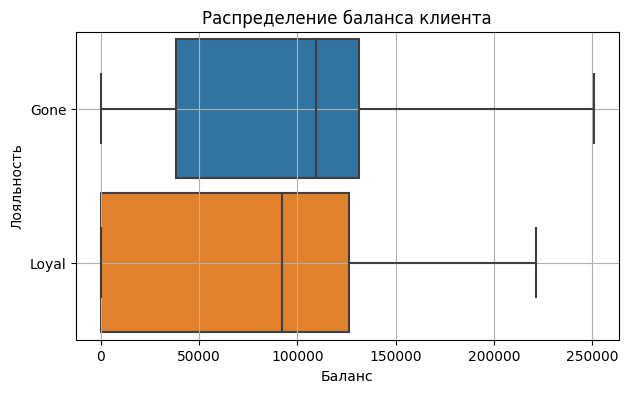

In [155]:
fig = plt.figure(figsize=(7, 4))
boxplot = sns.boxplot(
    data=churn_data,
    y='ExitedName',
    x='Balance',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение баланса клиента');
boxplot.set_xlabel('Баланс');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

**Выводы по графику:** по коробчатой диаграмме можно судить что суммы лояльных клиентов в среднем менее 100000$, а у ушедших более 100000$.

Может быть у сумм свыше 100000$ меняется процентная ставка, что становится не очень выгодно держать такую сумму и уходят в другой банк с более высокой процентной ставкой. 

### 9.4. Посмотрите на распределение возраста в разрезе признака оттока. В какой группе больше потенциальных выбросов? На какую возрастную категорию клиентов стоит обратить внимание банку?

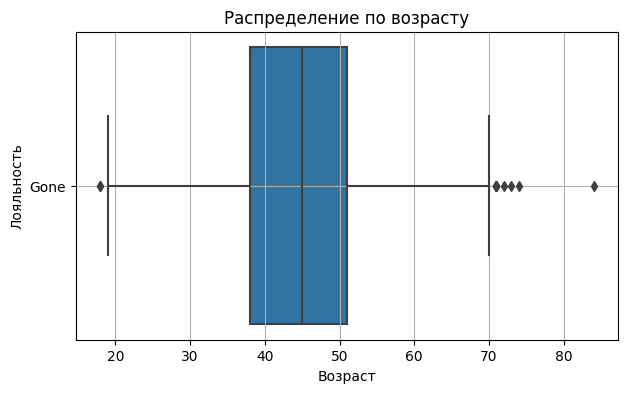

In [156]:
balance_age = churn_data[churn_data['Exited'] == 1]

fig = plt.figure(figsize=(7, 4))
boxplot = sns.boxplot(
    data=balance_age,
    x='Age',
    y='ExitedName',
    orient='h',
    width=0.9
)
boxplot.set_title('Распределение по возрасту');
boxplot.set_xlabel('Возраст');
boxplot.set_ylabel('Лояльность');
boxplot.grid()

**Выводы по графику:** по коробчатой диаграмме можно судить что возраст ушедших клиентов примерно от 40 до 50 лет.

На эту возрастную группу и следует обратить внимание

### 9.5. Постройте график, который показывает взаимосвязь кредитного рейтинга клиента и его предполагаемой зарплаты. Добавьте расцветку по признаку оттока клиентов. Какова взаимосвязь между признаками? Если не видите явной взаимосвязи, укажите это.

In [157]:
fig = px.scatter(
    data_frame=churn_data, #датафрейм
    y='CreditScore', #ось абсцисс
    x='EstimatedSalary', #ось ординат
    color='ExitedName',
    height=500, #высота
    width=1000, #ширина
    title='Кредитный рейтинг от зарплаты' #заголовок
)
fig.show()

**Выводы по графику:** по диаграмме рассеивания можно судить что у ушедших клиентов с низким кредитным рейтингом доход выше среднего, а у лояльных клиентов доходы примерно равны на всех кредитных рейтингах. Явной взаимосвязи нет.

### 9.6. Кто чаще уходит, мужчины или женщины? Постройте график, который иллюстрирует это.

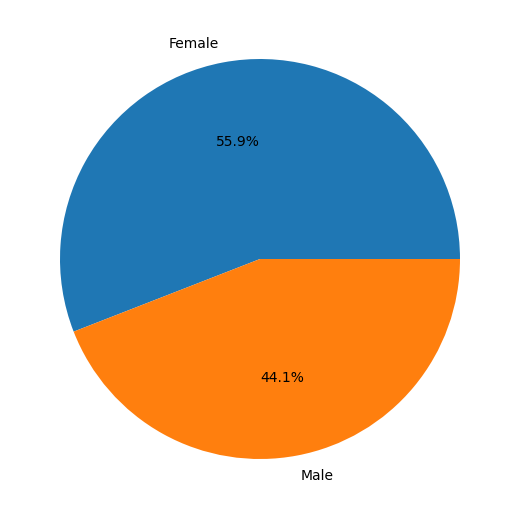

In [158]:
gone = churn_data[churn_data['ExitedName'] == 'Gone']

client_gender = gone['Gender'].value_counts()
fig = plt.figure(figsize=(5, 5))
axes = fig.add_axes([0, 0, 1, 1])
axes.pie(
    client_gender,
    labels=client_gender.index,
    autopct='%.1f%%'    
);

**Выводы по графику:** по графику видно, что женщины уходят чаще.

### 9.7. Как отток клиентов зависит от числа приобретённых у банка услуг? Для ответа на этот вопрос постройте многоуровневую столбчатую диаграмму.

In [159]:
exited_count = churn_data.groupby(['NumOfProducts'])['ExitedName'].value_counts().unstack(fill_value=0)

fig = px.bar(
    data_frame=exited_count,
    x=exited_count.index,
    y=['Gone', 'Loyal'],
    height=500, #высота
    width=700, #ширина
    title='Взаимосвязь оттока клиентов и числа приобретённых услуг'
)
fig.show()

**Выводы по графику:** по графику видно, что отток клиентов происходит после первой приобретенной услуги

### 9.8. Как влияет наличие статуса активного клиента на отток клиентов? Постройте диаграмму, иллюстрирующую это. Что бы вы предложили банку, чтобы уменьшить отток клиентов среди неактивных?

In [160]:
isactive_count = churn_data.groupby(['Exited'])['IsActiveMember'].value_counts().unstack(fill_value=0)

fig = px.bar(
    data_frame=isactive_count,
    x=isactive_count.index,
    y=['Loyal', 'Gone'],
    height=500, #высота
    width=700, #ширина
    title='Взаимосвязь оттока клиентов и статуса активности'
)
fig.show()

**Выводы по графику:** по графику видно, что примерно 2/3 клиентов из ушедших были не активны, хотя лояльные клиенты тоже не все активны, но при этом они не уходят. Следовательно это не играет большой роли для ухода из банка.

### 9.9. В какой стране доля ушедших клиентов больше? Постройте тепловую картограмму, которая покажет это соотношение на карте мира. Предположите, с чем это может быть связано.

In [10]:

choropleth_data = churn_data.groupby(['Geography'])['ExitedName'].value_counts().unstack(fill_value=0)
choropleth_data['ExitedSum'] = choropleth_data['Gone'] + choropleth_data['Loyal']
choropleth_data['ExitedPercent'] = choropleth_data['Gone'] / choropleth_data['ExitedSum']*100

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations=choropleth_data.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="ExitedPercent", #от чего зависит цвет       
    range_color=[15, 35],
    title='Ушедшие клиенты по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    #color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

In [9]:
choropleth_data = churn_data.groupby(['Geography'])[['Exited']].mean()*100

#строим график
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations=choropleth_data.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="Exited", #от чего зависит цвет       
    range_color=[15, 35],
    title='Ушедшие клиенты по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    #color_continuous_scale='Reds' #палитра цветов
)

#отображаем его
fig.show()

In [15]:
choropleth_data = churn_data.groupby(['Geography'])['ExitedName'].value_counts().unstack(fill_value=0)
choropleth_data['ExitedSum'] = choropleth_data['Gone'] + choropleth_data['Loyal']
choropleth_data['ExitedPercent'] = (choropleth_data['Gone'] / choropleth_data['ExitedSum']*100).round(1)

display(choropleth_data)
fig = px.choropleth(
    data_frame=choropleth_data, #датафрейм
    locations=choropleth_data.index, #столбец с локациями
    locationmode = "country names", #режим сопоставления локаций с базой plotly
    color="ExitedPercent", #от чего зависит цвет       
    range_color=[15, 35],
    title='Ушедшие клиенты по странам', #заголовок
    width=800, #ширина
    height=500, #высота
    color_continuous_scale='Reds' #палитра цветов
)
# название стран и информация на карте
fig.add_scattergeo(
    locations = choropleth_data.index,
    locationmode = "country names",
    # данные для подписей на карте
    customdata = np.stack((choropleth_data.Gone, choropleth_data.ExitedPercent), axis=-1), 
    text = choropleth_data.index,
    # шаблон текста
    texttemplate='<b style="color: #3C4048; font-size:12px;">%{text}</b>'
                 '<br>%{customdata[0]}'
                 '<br>%{customdata[1]}%',
    hoverinfo = 'skip', # отмена всплывающего окна
    mode = 'text'
)

#отображаем его
fig.show()

ExitedName,Gone,Loyal,ExitedSum,ExitedPercent
Geography,,,,
France,810,4204,5014,16.2
Germany,814,1695,2509,32.4
Spain,413,2064,2477,16.7


**Выводы по графику:** по графику видно, что доля ушедших клиентов больше в Германии. Может плохая локализация интерфейса в онлайн банке для жителей данной страны, а может в их стране есть банки с более выгодными условиями и надо узнать куда они уходят и что там за условия.

### 9.10. Переведите числовой признак CreditScore в категориальный.
Для этого воспользуйтесь функцией get_credit_score_cat(), которая приведена ниже. Примените её к столбцу CreditScore и создайте новый признак CreditScoreCat — категории кредитного рейтинга.
Постройте сводную таблицу, строками которой являются категории кредитного рейтинга (CreditScoreCat), а столбцами — количество лет, в течение которых клиент пользуется услугами банка (Tenure). В ячейках сводной таблицы должно находиться среднее по признаку оттока (Exited) — доля ушедших пользователей.
На основе полученной сводной таблицы постройте тепловую карту с аннотацией. Найдите на тепловой карте категории клиентов, которые уходят чаще всего.

Tenure,0,1,2,3,4,5,6,7,8,9,10
CreditScoreCat,,,,,,,,,,,
Excellent,0.275000,0.208333,0.137255,0.168317,0.131868,0.233333,0.241379,0.127660,0.196078,0.270833,0.254902
Fair,0.217391,0.215596,0.213043,0.216450,0.197248,0.206897,0.236364,0.171103,0.209016,0.190045,0.205357
Good,0.203822,0.203608,0.187342,0.205962,0.195122,0.214470,0.182857,0.191892,0.152355,0.194667,0.197802
Poor,0.226415,0.259398,0.211765,0.212245,0.233202,0.199153,0.179916,0.151261,0.214575,0.251082,0.169492
Very_Poor,0.444444,0.253731,0.151515,0.285714,0.293103,0.149254,0.225352,0.206349,0.253521,0.229508,0.333333


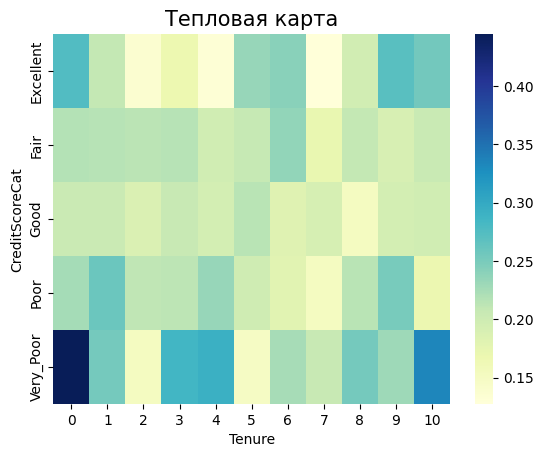

In [162]:
def get_credit_score_cat(credit_score):
    if credit_score >= 300 and credit_score < 500:
        return "Very_Poor"
    elif credit_score >= 500 and credit_score < 601:
        return "Poor"
    elif credit_score >= 601 and credit_score < 661:
        return "Fair"
    elif credit_score >= 661 and credit_score < 781:
        return "Good"
    elif credit_score >= 781 and credit_score < 851:
        return "Excellent"
    elif credit_score >= 851:
        return "Top"
    elif credit_score < 300:
        return "Deep"
    

churn_data['CreditScoreCat'] = churn_data['CreditScore'].apply(get_credit_score_cat)
    
pivot = churn_data.pivot_table(
    values='Exited',
    columns='Tenure',
    index='CreditScoreCat',
)
pivot.columns = pivot.columns.astype('string')
display(pivot)

heatmap = sns.heatmap(data=pivot, cmap='YlGnBu')
heatmap.set_title('Тепловая карта', fontsize=15);

**Выводы по графику:** по графику видно, что категории клиентов "Very_Poor" уходят чаще всего, далее "Poor" и "Excellent", но в основном или еще мало являяесь клиентом или по истечении 9-10 лет.